In [17]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
import numpy as np
import pandas as pd
rate, data = wav.read('audio/a-440-sine.wav')

In [13]:
def fft4Dummies(data, rate):
    
    fft_out = fft(data)
    freq_vector = fftfreq(len(fft_out), 1.0/rate)
    fft_trim = fft_out[range(len(fft_out)//2)]
    freq_vector_trim = freq_vector[range(len(fft_out)//2)]
    
    return freq_vector_trim, fft_trim

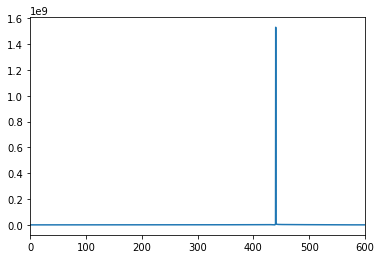

In [14]:
freq_vector_trim, fft_trim = fft4Dummies(data, rate)
plt.plot(freq_vector_trim,np.abs(fft_trim))
# plt.ylim(0, 2000) 
plt.xlim(0,600)
plt.show()

In [21]:
freq_mapping_df = pd.read_csv('Note-Freq Mapping.csv')
freq_mapping = freq_mapping_df.iloc[:, 1:4].values
note_mapping = freq_mapping_df.iloc[:, 0:3].values
frequencies = freq_mapping[:,-1]

[   16.351    17.324    18.354    19.445    20.601    21.827    23.124
    24.499    25.956    27.5      29.135    30.868    32.703    34.648
    36.708    38.891    41.203    43.654    46.249    48.999    51.913
    55.       58.27     61.735    65.406    69.296    73.416    77.782
    82.407    87.307    92.499    97.999   103.826   110.      116.541
   123.471   130.813   138.591   146.832   155.563   164.814   174.614
   184.997   195.998   207.652   220.      233.082   246.942   261.626
   277.183   293.665   311.127   329.628   349.228   369.994   391.995
   415.305   440.      466.164   493.883   523.251   554.365   587.33
   622.254   659.255   698.456   739.989   783.991   830.609   880.
   932.328   987.767  1046.502  1108.731  1174.659  1244.508  1318.51
  1396.913  1479.978  1567.982  1661.219  1760.     1864.655  1975.533
  2093.005  2217.461  2349.318  2489.016  2637.021  2793.826  2959.955
  3135.964  3322.438  3520.     3729.31   3951.066  4186.009  4434.922
  4698.636 

In [24]:
def findNearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [25]:
def sumAmps(fft_amps,fft_freqs, note_freq_array):
    
    bucketed_array = np.zeros([len(note_freq_array),5])
    bucketed_array[:,0] = note_freq_array
    
    # first column - notes
    # second column - amplitude sum
    # third column - number in bucket
    # fourth column - average
    # fifth column - max
        
    
    for i in range(0,len(fft_freqs)):
        
        # find nearest freq
        nearest, index = findNearest(note_freq_array,fft_freqs[i])
        # increase amplitude sum of nearest freq
        bucketed_array[index,1] = bucketed_array[index,1] + fft_amps[i]
        # increase count by 1
        bucketed_array[index,2] = bucketed_array[index,2] + 1
        # assign as max if applicable
        if (fft_amps[i] > bucketed_array[index,-1]): # if the current amplitude being looked at is bigger than the highest amplitude for that bucket
            bucketed_array[index,-1] = fft_amps[i]
     
    # find average by dividing total sum of bucket by number in bucket
    bucketed_array[:,3] = bucketed_array[:,1]/bucketed_array[:,2] 
    
    return bucketed_array
    

In [36]:
bucketed_array = sumAmps(fft_trim,freq_vector_trim, frequencies)
print('%f' %(bucketed_array[:5,:]))

C:\Users\Kip\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Kip\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


TypeError: unsupported format string passed to numpy.ndarray.__format__